#  <span style="text-decoration:underline;">Assignment 1</span>: Analyzing Stack Overflow Data

## Introduction 

In this assignment, we will look at [Stack Overflow](https://stackoverflow.com/) post data from the year of 2015 and measure the similarity of users by looking at the types of questions they answer. Do not delete the output of your code cells. This assignment must be completed **individually** by each student.

## Submission 

Please use the following invitation link to create your assignment repository for this assignment: [https://classroom.github.com/a/epLjOcUA](https://classroom.github.com/a/epLjOcUA). Include your BU username within your submission by adding it here: **<BU username&gt;**.

## Data Retrieval

Below we make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [1]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")

print(response) # Displays the HTTP response code (should be 200 for success).
#I'm not sure why after a while I kept getting an error 

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [2]:
#print(response.text)

The raw response is not very useful for automated processing. Instead, we can decode the raw response as JSON and then use the `json` library to print it.

In [3]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=2))

{
  "items": [
    {
      "tags": [
        "php",
        "mysql",
        "arrays",
        "mysqli"
      ],
      "owner": {
        "reputation": 333,
        "user_id": 3210431,
        "user_type": "registered",
        "accept_rate": 76,
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
        "display_name": "salep",
        "link": "https://stackoverflow.com/users/3210431/salep"
      },
      "is_answered": true,
      "view_count": 252,
      "accepted_answer_id": 27727478,
      "answer_count": 2,
      "score": 0,
      "last_activity_date": 1420071815,
      "creation_date": 1420070458,
      "question_id": 27727385,
      "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
      "title": "Inserting multiple records into MySQL from an array"
    },
    {
      "tags": [
        "apache-pig"
      ],
      "owner": {
        "reputation": 6,
        "user_id": 868779,
        "user_type": "r

It is now possible to see that the response consists of a list of question items. For each of these items, we get information about its attributes: `creation_date`, `answer_count`, `owner`, `title`, and so on.

Notice that `has_more` is `true`. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

## <span style="text-decoration:underline;">Problem 1</span>: Parsing the responses

In this problem you will practice using some of the techniques and string handling methods that Python offers. Our goal is to extract the interesting parts of the response data and transform them into a format that will be useful for our final analysis.

**<span style="text-decoration:underline;">Part A</span> (8 points):** We will first isolate the `creation_date` attribute in the response. Complete the definition of the ```print_creation_dates_json()``` below, which reads the response and prints the creation dates.

In [4]:
#parameter of this method is the response object created out of response
def print_creation_dates_json(response):
  print(response.keys())
  for post in response['items']:
    print(post['creation_date'])
    
#print_creation_dates_json(json_response)    

**<span style="text-decoration:underline;">Part B</span> (8 points):** Write code that issues requests to retrieve all of the creation dates of questions posted on the first day in 2015. The code should call the ```print_creation_dates_json()``` function to print out each page of results.

**Hint:** You can use a loop and take advantage of the `has_more` attribute to request additional pages of results if they exist. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle); you can use the Python `sleep` function in the `time` module ([documentation can be found here](https://docs.python.org/3/library/time.html#time.sleep)) to add a delay between requests.

In [5]:

import requests
import json
''''
helper method to send requests 
and it gets the page number as a parameter 
'''
def send_request(counter):
  start_time = 1420070400 # 01-01-2015 at 00:00:00
  end_time   = 1420156800 # 01-02-2015 at 00:00:00
  response = requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(counter) + "&pagesize=100" + 
                          "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
  return response
#----------------------------------------
# I have commented out this part because It keeps issueing 502 error
'''
response = send_request(1)
print(response)
jsonResponse = response.json()
print_creation_dates_json(jsonResponse)
counter = 1;
while json_response['has_more']:
  counter = counter + 1
  response = send_request(counter)
  jsonResponse = response.json()
  print_creation_dates_json(jsonResponse)
'''  


"\nresponse = send_request(1)\nprint(response)\njsonResponse = response.json()\nprint_creation_dates_json(jsonResponse)\ncounter = 1;\nwhile json_response['has_more']:\n  counter = counter + 1\n  response = send_request(counter)\n  jsonResponse = response.json()\n  print_creation_dates_json(jsonResponse)\n"

Due to time constraints, we have already downloaded the [data dump](http://cs-people.bu.edu/lapets/506/data/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. Note that the XML file is 10GB in size unzipped. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab, or you can download it onto a USB drive. You may want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on the whole dataset, you will get a `MemoryError`.

Do not commit the data file to your repository. You may assume that we will place the data file in the same directory as your submitted notebook file, so use a relative path when loading the data file.

**<span style="text-decoration:underline;">Part C</span> (16 points):** Write a function that parses out the questions posted in 2015. These are posts with `PostTypeId=1`. The function should return a pandas `DataFrame`  object with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Call the function on an appropriate input and print out the `DataFrame` object; do not clear the output.

**Hint:** You should be able to use `iterparse` ([documentation can be found here](https://docs.python.org/3.8/library/xml.etree.elementtree.html#xml.etree.ElementTree.iterparse)):
```
from lxml.etree import iterparse
```
Once you create the `iterparse` object (let's call it `parsed`) for the file, you can use a `for` loop such as:
```
for _, element in parsed:
    # ...
```
You can use the `.tag` and `.get()` methods of the `element` object to inspect it and extract data from it.

In [6]:
#for runnig this cell please change the relative path of the file 
from lxml.etree import iterparse as parsed
import pandas as pd

#helper method which returns the first tags in the tags atrribute of element
def get_first_tag(tagsAttribute):
    splitedTags = tagsAttribute.replace('<','').split('>')
    return splitedTags[0]
#---------------------------------------------------------------------
#thie method creates data frames by appending rows to data frame incremantally 
def create_dataFrame_using_append(limit):
  count = 0
  df = pd.DataFrame(columns=['Id', 'CreationDate','OwnerUserId','FirstTag'])
  for _, element in parsed('../data.xml'):
    if (count <= limit):
      count = count + 1
      #check to see if the post is a question and check the sanity of data: ToDo: check for all the keys
      if (element.attrib['PostTypeId'] == '1' and 'OwnerUserId' in element.attrib):
        print(count)
        df = df.append({'Id': element.attrib['Id'],
                      'CreationDate': element.attrib['CreationDate'],
                      'OwnerUserId': element.attrib['OwnerUserId'],
                      'FirstTag': get_first_tag(element.attrib['Tags'])
                     }, 
                     ignore_index=True)
    else: 
      break
  return df
#--------------------------------------------------------------
#this method created data frames out a dictionary
def create_dataFrame_out_of_dictionary(limit):
  dataDict = {}
  count = 0
  rowIndex = 1
  for _, element in parsed('data.xml'):
    if (count <= limit):
      count = count + 1
      #check to see if the post is a question and check the sanity of data: ToDo: check for all the keys
      if (element.attrib['PostTypeId'] == '1' and 'OwnerUserId' in element.attrib):
        #create a list of values in the row
        row = [element.attrib['Id'],
               element.attrib['CreationDate'],
               element.attrib['OwnerUserId'],
               get_first_tag(element.attrib['Tags'])]
        #append rows to dictionary
        dataDict[rowIndex] = row
        rowIndex = rowIndex + 1
    else:
      break
  df = pd.DataFrame.from_dict(dataDict, orient='index', columns=['Id', 'CreationDate','OwnerUserId','FirstTag'])
  return df

questions = create_dataFrame_out_of_dictionary(500000)
questions

,Id,CreationDate,OwnerUserId,FirstTag
1,27727385,2015-01-01T00:00:58.253,3210431,php
2,27727388,2015-01-01T00:01:43.673,868779,apache-pig
3,27727391,2015-01-01T00:02:32.123,4372672,ios
4,27727393,2015-01-01T00:02:57.983,2482149,sql-server
5,27727394,2015-01-01T00:03:31.337,4263870,php
6,27727396,2015-01-01T00:04:01.407,4409381,android
7,27727406,2015-01-01T00:05:03.773,875317,c#
8,27727407,2015-01-01T00:05:27.167,821742,java
9,27727408,2015-01-01T00:05:34.733,2595033,c#
10,27727409,2015-01-01T00:06:17.720,1815395,apache


## <span style="text-decoration:underline;">Problem 2</span>: Analyzing the responses

**<span style="text-decoration:underline;">Part A</span> (50 points):** Write a function that measures the similarity of the top 100 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class.

Note that answers are posts with `PostTypeId=2`. The identifier of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

**Hint:** You may want to begin your solution by constructing a data set in the following way:
1. Find users with the most responses using `.groupby()` on a data frame containing all of the entries in the answers data set.
2. Sort to find the top 100 users from the result above.
3. Find all the question identifiers (using `ParentId`) among the answers of the top 100 users (within the answers data set).
4. Join/merge the result above with the questions data set to get the tags of the questions answered by the top 100 users.

In [7]:
import numpy as np
import math 
def create_answers_data_frame(limit):
  dataDict = {}
  count = 0
  rowIndex = 1
  for _, element in parsed('data.xml'):
    if (count <= limit):
      count = count + 1
      #check to see if the post is a answer and check the sanity of data: ToDo: check for all the keys
      if (element.attrib['PostTypeId'] == '2' and 'OwnerUserId' in element.attrib):
        #create a list of values in the row
        row = [element.attrib['OwnerUserId'],
               element.attrib['ParentId']]
        #append rows to dictionary
        dataDict[rowIndex] = row
        rowIndex = rowIndex + 1
    else:
      break
  answers = pd.DataFrame.from_dict(dataDict, orient='index', columns=['OwnerUserId', 'ParentId'])
  answers['NumQuestionsAnswered'] = 1
  return answers
#-----------------------------------------------------------------------
#this method returns  a data frame containing top hundred users
def create_top_hundred_users_df(answers):
  groupedAnswers = answers.groupby(['OwnerUserId'], sort=False)['NumQuestionsAnswered'].sum().to_frame()
  sorted = groupedAnswers.sort_values('NumQuestionsAnswered', ascending=False)
  return sorted.head(n=100)

#create the initial dataframe
answers = create_answers_data_frame(500000)
#create top hundred users data frame
topHundredUsers = create_top_hundred_users_df(answers)
#merge top hundred users with initial answers data frame
merged = answers.merge(topHundredUsers, left_on='OwnerUserId', right_on='OwnerUserId')
#merge the result with question data frame
Q_A_merged = merged.merge(questions, left_on='ParentId', right_on='Id')
#drop the unwanted columns
Q_A_merged = Q_A_merged[['OwnerUserId_x','ParentId','FirstTag','NumQuestionsAnswered_y']]
#add this new column so we can do the aggregation on 
Q_A_merged['numQuestionsAnswered'] = 1
featureVector = pd.pivot_table(Q_A_merged, index=['FirstTag'], columns=['OwnerUserId_x'], values=['numQuestionsAnswered'])

featureVectorDict = featureVector.to_dict()

#assuming both these parameters have the same length it calculates similarity
#of two vectors based on the total number of components having different values 
#in that vector, basically featureVectors are considered as bit vectors 
def get_similarity(featureVector1,featureVector2):
  numDifferentBits = 0
  for key in featureVector1:
      if (featureVector1[key] == 1 and math.isnan(featureVector2[key])) or(featureVector2[key] == 1 and math.isnan(featureVector1[key])):
        numDifferentBits = (numDifferentBits + 1)
  return (len(featureVector1.keys()) - numDifferentBits)/len(featureVector1.keys())

#this method creates a a dictionary. keys of this dictionary are all possible 
#pairs of (userId1, userId2) in the list of top hundred users 
#and the values are the similarty of those users 
#based on the type of the questions they have answered using hamilton metric 
def create_similarity_dict(featureVectorDict):
  similarityDict = {}
  for key1 in featureVectorDict:
    for key2 in featureVectorDict:
      similarity = get_similarity(featureVectorDict[key1],featureVectorDict[key2])
      similarityDict['(' + key1[1] +'#' + key2[1] + ')'] = similarity
  return similarityDict

similarityDict = create_similarity_dict(featureVectorDict)
#print(similarityDict)


**<span style="text-decoration:underline;">Part B</span> (18 points):** Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html).

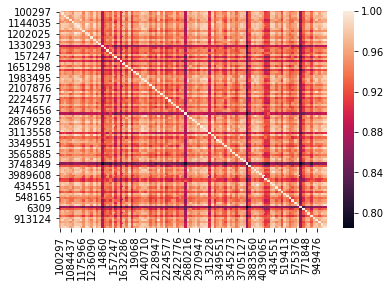

In [8]:
import seaborn as sns
%matplotlib inline

userIdList = []
for key in featureVectorDict:
  userIdList.append(key[1])

similarity_values = []
for i in range(len(userIdList)):
    listComponent=  []
    for j in range (len(userIdList)):
      key = '(' + userIdList[i] + '#' + userIdList[j] + ')'
      listComponent.append(similarityDict[key])
    similarity_values.append(listComponent)
#create a data frame out which we can create a heatmap
df1 = pd.DataFrame(similarity_values, index=userIdList, columns=userIdList)
sns.heatmap(df1)
